In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 


In [2]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D as MaxPool2D
from keras.layers.convolutional import Conv2D

from tensorflow.keras.datasets import cifar10

In [37]:
# 1번
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [38]:
# label
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
# X_train과 그에 맞는 결과값인 X_test 100개 쌍을 출력.
y_train # y_train[0][0]을 해야 6이 나온다. []로 안감싸진 것이 나오게 하기 위해서는.

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [40]:
# 내부에 괄호 없애는 작업
fixed_y_train = []
for i in range(50000):
  fixed_y_train.append(y_train[i][0])

In [41]:
# 0 ~ 255 -> 0 ~ 1로 하여 속도적인 이점을 꾀함
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
rand_list = []

for i in range(100):
  rand_list.append(np.random.randint(50000))
rand_list

[447,
 11265,
 14819,
 3181,
 8984,
 41479,
 45875,
 15638,
 33168,
 45899,
 47925,
 29496,
 13015,
 28616,
 49369,
 15295,
 13546,
 40209,
 7898,
 13443,
 27019,
 20235,
 47833,
 24742,
 13527,
 9267,
 39737,
 41257,
 14035,
 29904,
 12627,
 16626,
 43043,
 28686,
 13272,
 32975,
 4895,
 30465,
 37792,
 48039,
 6446,
 28830,
 14519,
 48885,
 19542,
 15852,
 9358,
 44109,
 47304,
 19716,
 2971,
 3182,
 19168,
 21386,
 46883,
 23514,
 39287,
 26580,
 7100,
 36184,
 45719,
 17500,
 48282,
 16711,
 49462,
 7295,
 42466,
 17938,
 10523,
 44913,
 25979,
 38898,
 40699,
 41432,
 3551,
 32081,
 35682,
 15245,
 11072,
 14840,
 32348,
 9073,
 45720,
 28956,
 28340,
 36910,
 13159,
 41361,
 15835,
 15258,
 18932,
 37374,
 37142,
 21374,
 19734,
 14339,
 7479,
 41063,
 879,
 23466]

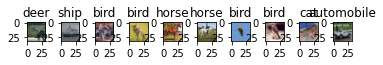

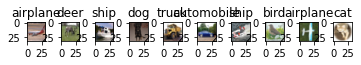

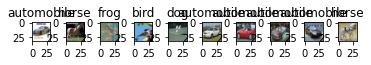

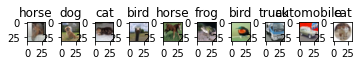

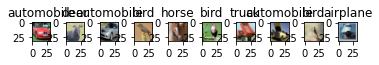

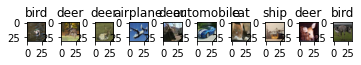

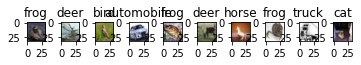

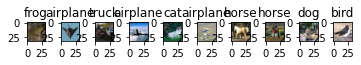

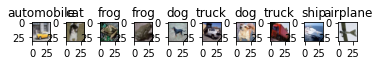

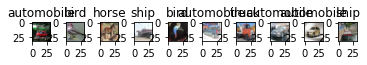

In [9]:
# 앞에서 random 하게 train 에서 골라낸 리스트 rand_list를 이용해서 plot 출력
index = 0
plt.figure(1)
for i in range(10):
  for j in range(10):
    plt.subplot2grid((10, 10), (i, j))
    plt.title(labels[fixed_y_train[rand_list[index]]])
    plt.imshow(X_train[rand_list[index]])
    index += 1
  plt.show()

In [10]:
# 2번
# sklearn의 전처리 모듈을 이용한 one-hot encoding으로 data label 변환.
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)

onehot_encoder.fit(y_train)

y_train = onehot_encoder.transform(y_train)
y_test = onehot_encoder.transform(y_test)

In [11]:
# one-hot encoding 변환 결과 확인 가능.
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [19]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = Sequential([
  Conv2D(32, kernel_size=5, activation='relu', input_shape=(32,32,3)),
  Conv2D(64, 5, activation='relu'),
  MaxPool2D(),
  Conv2D(128, 5, activation='relu'),
  MaxPool2D(),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.3),
  # class(labels) 개수
  Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 10)

In [22]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 327s 514ms/step - loss: 1.9037 - accuracy: 0.2835 - val_loss: 1.3611 - val_accuracy: 0.5115
Epoch 2/10
625/625 [==============================] - 316s 506ms/step - loss: 1.3628 - accuracy: 0.5048 - val_loss: 1.1363 - val_accuracy: 0.5958
Epoch 3/10
625/625 [==============================] - 317s 507ms/step - loss: 1.1892 - accuracy: 0.5770 - val_loss: 1.0840 - val_accuracy: 0.6220
Epoch 4/10
625/625 [==============================] - 315s 503ms/step - loss: 1.0723 - accuracy: 0.6201 - val_loss: 0.9939 - val_accuracy: 0.6525
Epoch 5/10
625/625 [==============================] - 317s 507ms/step - loss: 0.9953 - accuracy: 0.6509 - val_loss: 0.9753 - val_accuracy: 0.6583
Epoch 6/10
625/625 [==============================] - 315s 505ms/step - loss: 0.9088 - accuracy: 0.6792 - val_loss: 0.9173 - val_accuracy: 0.6781
Epoch 7/10
625/625 [==============================] - 315s 503ms/step - loss: 0.8720 - accuracy: 0.6971 - val_loss: 0.8641 -

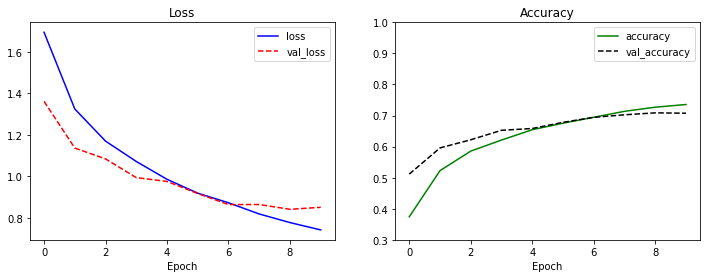

313/313 [==============================] - 19s 62ms/step - loss: 0.8499 - accuracy: 0.7106


[0.8499428629875183, 0.7106000185012817]

In [25]:
# 3번 평가
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

In [35]:
predictions = model.predict(X_test)
predictions = onehot_encoder.inverse_transform(predictions)
predictions = predictions.astype(int)

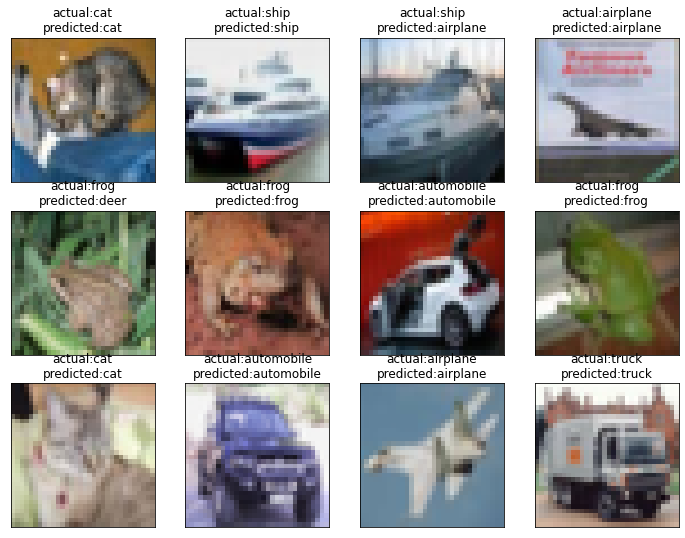

In [44]:
# 예측 및 실제 값 표시
fig, axes = plt.subplots(ncols = 4, nrows = 3, sharex = False, sharey = True, figsize = (12, 9))

index = 0
for i in range(3):
    for j in range(4):
        axes[i, j].set_title('actual:' + labels[y_test[index][0]] + '\n' + 'predicted:' + labels[predictions[index][0]])
        axes[i, j].imshow(X_test[index], cmap = 'gray')
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        index += 1
plt.show()
